In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dirpath = os.path.join(os.getcwd(),'output')
file = os.path.join(dirpath, 'C:\\SNU EnSite\\IPMSP\\output\\240621_test_ep600_100\\240621_test_ep600_100_log.csv')
data = pd.read_csv(file)

In [75]:
data = data[data['DDT']>=1.0]
data

,Type,Index,reward,r_tard,r_setup,SSPT,ATCS,MDD,COVERT,Avg_setup,Avg_tardiness,DDT,PT_var
4,SSPT,0,-24.68,1.00,-63.2,100,0,0,0,3.16,22.87,1.0,0.1
5,SSPT,1,-24.87,2.15,-65.4,100,0,0,0,3.27,17.03,1.0,0.1
6,SSPT,0,-25.07,6.35,-72.2,100,0,0,0,3.61,14.70,1.1,0.1
7,SSPT,1,-23.94,2.64,-63.8,100,0,0,0,3.19,38.63,1.1,0.1
8,SSPT,0,-20.34,7.31,-61.8,100,0,0,0,3.09,40.56,1.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,RL,1,-17.70,6.24,-53.6,16,83,0,1,2.68,31.20,1.0,0.5
246,RL,0,-11.28,21.60,-60.6,30,68,1,1,3.03,20.53,1.1,0.5
247,RL,1,-17.67,9.09,-57.8,22,75,2,1,2.89,24.48,1.1,0.5
248,RL,0,-11.34,18.17,-55.6,15,80,3,2,2.78,20.75,1.2,0.5


In [80]:
data_by_type = dict()
data_by_type['SSPT'] = data[data['Type'] == 'SSPT']
data_by_type['ATCS'] = data[data['Type'] == 'ATCS']
data_by_type['MDD'] = data[data['Type'] == 'MDD']
data_by_type['COVERT'] = data[data['Type'] == 'COVERT']
data_by_type['RL'] = data[data['Type'] == 'RL']

In [81]:
data_by_type['RL'].shape

(50, 13)

In [82]:
result = pd.DataFrame(columns=['Type','Avg_Setup','Avg_Tardiness','Reward'])
for method in ['SSPT','ATCS','MDD','COVERT','RL']:
    avg_setup = data_by_type[method]['Avg_setup'].mean()
    avg_tard = data_by_type[method]['Avg_tardiness'].mean()
    result.loc[result.shape[0]] = [method, avg_setup, avg_tard, 0.6*avg_tard + 0.4*avg_setup]

In [83]:
result

,Type,Avg_Setup,Avg_Tardiness,Reward
0,SSPT,3.2098,36.5056,23.18728
1,ATCS,2.6944,30.0156,19.08712
2,MDD,3.9640,35.8602,23.10172
3,COVERT,3.9322,35.3112,22.75960
4,RL,2.7632,30.6170,19.47548


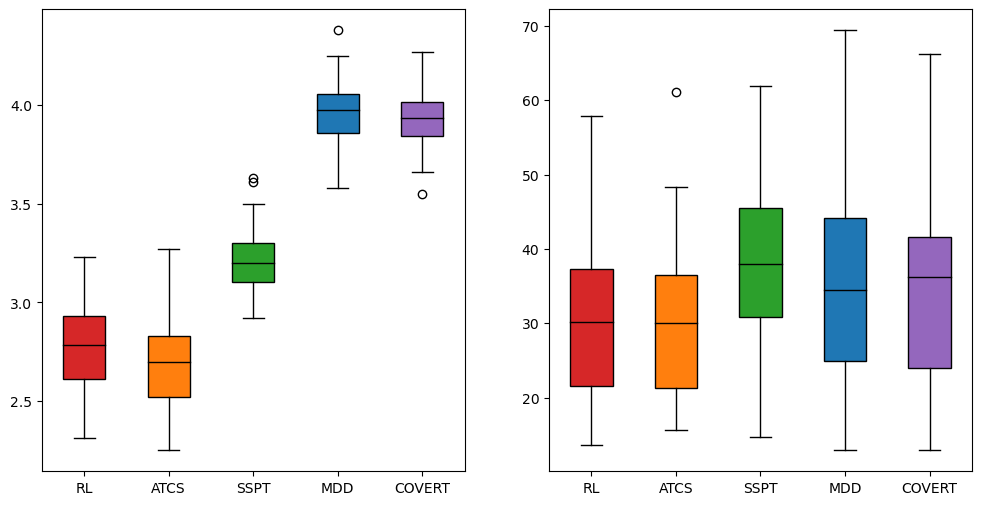

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
axes = [fig.add_subplot(1, 2, i + 1) for i in range(2)]
color = {'RL':'tab:red', 'ATCS':'tab:orange', 'SSPT':'tab:green', 'MDD':'tab:blue','COVERT':'tab:purple'}
for i, method in enumerate(['RL','ATCS','SSPT', 'MDD', 'COVERT']):
    axes[0].boxplot(data_by_type[method]['Avg_setup'], labels=[method], vert = True, widths = 0.5, positions = [i], patch_artist=True, boxprops=dict(facecolor=color[method], color='k'), medianprops=dict(color='k'))
    axes[1].boxplot(data_by_type[method]['Avg_tardiness'], labels=[method], vert = True, widths = 0.5, positions = [i], patch_artist=True, boxprops=dict(facecolor=color[method], color='k'), medianprops=dict(color='k'))
plt.show()

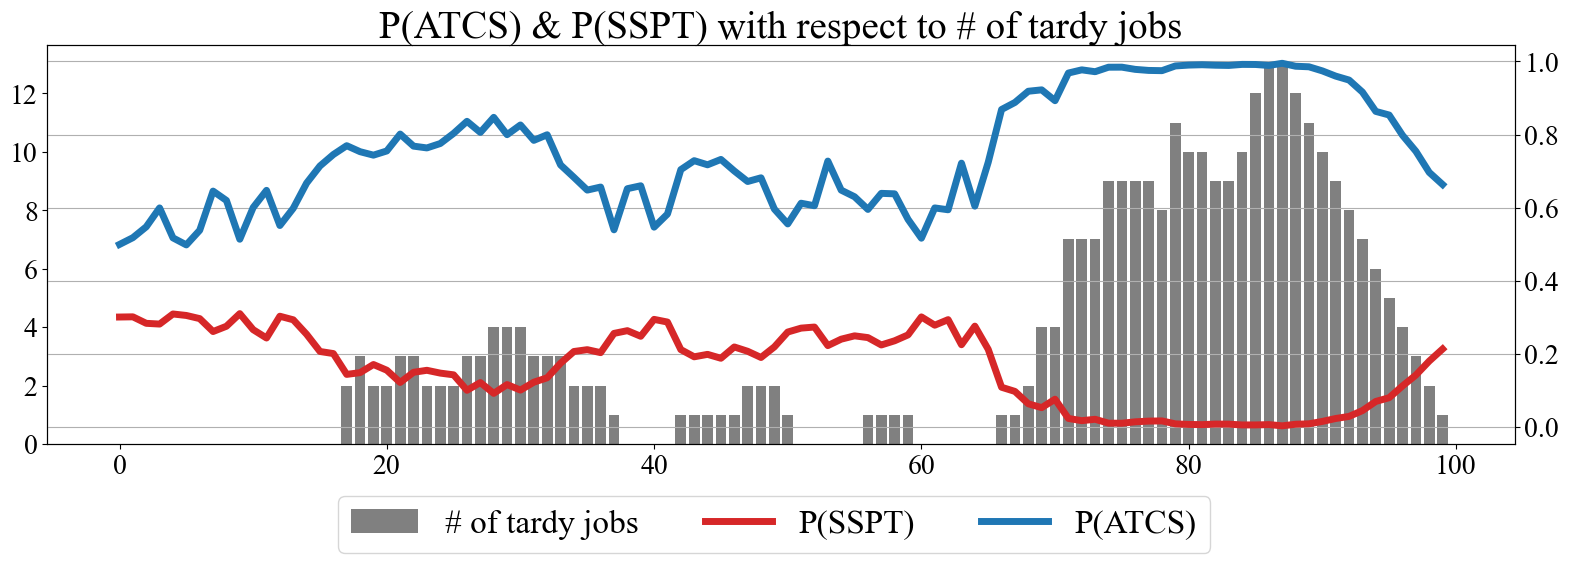

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams.update({'font.size': 14})
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

file = 'C:\\SNU EnSite\\IPMSP\\output\\240620_test_02_100\\log\\test_log_5.csv'
data = pd.read_csv(file)
data.reset_index(inplace=True)
fig, ax1 = plt.subplots(figsize=(16,5))
ax2 = ax1.twinx()
ax1.bar(data['index'], data['n_tardy'],label= '# of tardy jobs', color = 'grey')
ax2.plot(data['P(SSTP)'], label='P(SSPT)', color='tab:red',linewidth = 5 )
ax2.plot(data[' P(ATCS)'], label='P(ATCS)', color='tab:blue', linewidth = 5 )
plt.title('P(ATCS) & P(SSPT) with respect to # of tardy jobs', fontsize=28)
plt.grid(True, axis='y')
leg = fig.legend(loc='lower center', ncol=3,bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

In [92]:
data

,index,P(SSTP),P(ATCS),P(MDD),P(COVERT),Action,,SSPT,ATCS,MDD,COVERT,n_tardy,pick_tardy
0,0,0.300691,0.499337,0.112149,0.087823,COVERT,NaN,0,0,0,1,0,False
1,1,0.264907,0.616148,0.069422,0.049523,SSPT,NaN,1,0,0,1,0,False
2,2,0.302833,0.554996,0.083069,0.059101,ATCS,NaN,1,1,0,1,0,False
3,3,0.269461,0.637522,0.056206,0.036811,ATCS,NaN,1,2,0,1,0,False
4,4,0.294255,0.593901,0.066599,0.045245,MDD,NaN,1,2,1,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.301798,0.547520,0.085982,0.064701,ATCS,NaN,17,70,6,3,0,True
96,96,0.284242,0.596962,0.070619,0.048177,ATCS,NaN,17,71,6,3,0,True
97,97,0.279516,0.606867,0.066579,0.047038,ATCS,NaN,17,72,6,3,0,True
98,98,0.271465,0.611069,0.069671,0.047795,ATCS,NaN,17,73,6,3,0,True


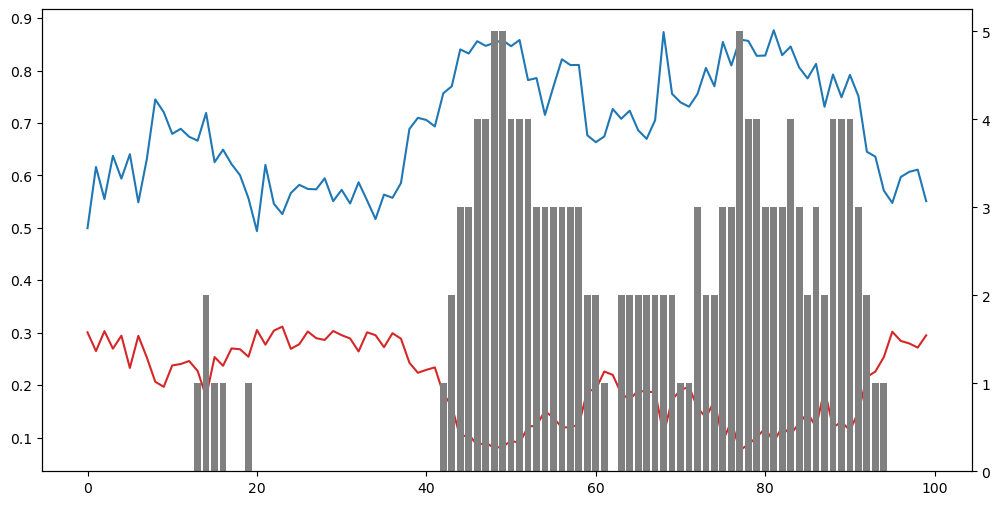